In [ ]:
%pip install tensorflow==2.15 
%pip install transformers
%pip install notebook ipykernel
%pip install tensorflow matplotlib
%pip install nltk beautifulsoup4
%pip install pandas transformers rouge-score
%pip install pandas scikit-learn
%pip install lxml
%pip install transformers sentencepiece
%pip install pydot
%pip install graphviz



  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: keras
    Found existing installation: keras 3.9.2
    Uninstalling keras-3.9.2:
      Successfully uninstalled keras-3.9.2
  Attemp


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install transformers

from transformers import pipeline


Note: you may need to restart the kernel to use updated packages.


In [2]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


Device set to use cpu


In [3]:
def generate_abstractive_summary(text):
    # Ensure text is under max token limit (~1024 for BART)
    if len(text.split()) > 500:
        text = ' '.join(text.split()[:500])
    summary_output = summarizer(text, max_length=150, min_length=50, do_sample=False)
    return summary_output[0]['summary_text']


In [3]:
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [21]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
text = "Your long input text here..."
summary = summarizer(text)[0]['summary_text']
print(summary)


Device set to use cpu
Your max_length is set to 142, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Your long input text is needed for this article. Use the Daily Discussion to help people understand today's featured news stories. Please share your long input with us by posting a comment below or posting a photo on our Facebook page. Please submit your longest input text with the word "long" in the body of the message.


In [5]:
%pip install notebook ipykernel
%pip install tensorflow matplotlib



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install nltk beautifulsoup4


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense

# Define a simple model to check if the imports are working
input_layer = Input(shape=(10,))
embedding_layer = Embedding(input_dim=1000, output_dim=64)(input_layer)
lstm_layer = LSTM(64)(embedding_layer)
dense_layer = Dense(1, activation='sigmoid')(lstm_layer)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=dense_layer)

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 64)         │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,089 (379.25 KB)

 Trainable params: 97,089 (379.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:



import numpy as np
import pandas as pd
import re
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")


In [12]:
# TEXT SUMMARY TRAINING BLOCK

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import joblib

# Sample dataset — add more entries for better results
data = {
    'text': [
        "I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.",
        # Add more texts here
    ],
    'summary': [
        "High-quality dog food, stew-like, well-liked by picky Labrador.",
        # Add more summaries
    ]
}

df = pd.DataFrame(data)

# Train vectorizer and nearest neighbor model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

nn = NearestNeighbors(n_neighbors=1, metric='cosine')
nn.fit(X)

# Save everything
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(nn, 'nn_model.pkl')
df.to_csv('text_summary_lookup.csv', index=False)

print("✅ Summary model and lookup table saved.")


✅ Summary model and lookup table saved.


✅ Training complete. Models and summary lookup saved.


In [25]:
import pandas as pd


In [ ]:

reviewsData=pd.read_csv("/summarizetext/amazonFood.csv",nrows=40000) #Taking 30,000 out of 500,000 reviews
print(reviewsData.shape) #Analyzing the shape of the dataset
reviewsData.head(n=10)


(40000, 6)


,ProductId,UserId,productName,Score,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,B00813GRG4,A1D87F6ZCVE5NK,"Southern Grove Premium Quality Roasted and Salted Jumbo Peanuts in Shell, 16-Ounce",1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 16oz - New Pack,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,B006K2ZZ7K,ADT0SRK1MGOEU,"Salt Water Taffy - Assorted, 5 lbs",4,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there wa..."
6,B006K2ZZ7K,A1SP2KVKFXXRU1,"Salt Water Taffy - Assorted, 5 lbs",5,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, ..."
7,B006K2ZZ7K,A3JRGQVEQN31IQ,"Salt Water Taffy - Assorted, 5 lbs",5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,B000E7L2R4,A1MZYO9TZK0BBI,"Organic Barley Seeds - 9 Lbs in Pre-Measured Bags for 10x20 Trays - Whole (Hull Intact) Barleygrass Seed - Ornamental Barley Grass, Juicing",5,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,B00171APVA,A21BT40VZCCYT4,"Eukanuba Natural Lamb & Rice Puppy, 4-Pound Bag",5,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [10]:
DATASET_COLUMNS = ["Id", "ProductId", "UserId", "ProfileName", "HelpfulnessNumerator", "HelpfulnessDenominator"]
reviewsData.columns = DATASET_COLUMNS
reviewsData.head(n=10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator
0,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,B00813GRG4,A1D87F6ZCVE5NK,"Southern Grove Premium Quality Roasted and Salted Jumbo Peanuts in Shell, 16-Ounce",1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 16oz - New Pack,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,B006K2ZZ7K,ADT0SRK1MGOEU,"Salt Water Taffy - Assorted, 5 lbs",4,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there wa..."
6,B006K2ZZ7K,A1SP2KVKFXXRU1,"Salt Water Taffy - Assorted, 5 lbs",5,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, ..."
7,B006K2ZZ7K,A3JRGQVEQN31IQ,"Salt Water Taffy - Assorted, 5 lbs",5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,B000E7L2R4,A1MZYO9TZK0BBI,"Organic Barley Seeds - 9 Lbs in Pre-Measured Bags for 10x20 Trays - Whole (Hull Intact) Barleygrass Seed - Ornamental Barley Grass, Juicing",5,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,B00171APVA,A21BT40VZCCYT4,"Eukanuba Natural Lamb & Rice Puppy, 4-Pound Bag",5,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [11]:
reviewsData.drop(['Id', 'ProductId', 'UserId', 'ProfileName' , 'HelpfulnessNumerator' , 'HelpfulnessDenominator'],axis = 1 ,inplace = True)
reviewsData.head(n=10)

""
0
1
2
3
4
5
6
7
8
9


In [6]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Load full dataset
df = pd.read_csv("amazonFood.csv")

# Select first 100 rows
df = df.head(41713)

# Make sure correct column names are used
assert 'Text' in df.columns and 'Summary' in df.columns, "Dataset must contain 'Text' and 'Summary' columns"

# Create lookup DataFrame
texts = df['Text'].astype(str).tolist()
summaries = df['Summary'].astype(str).tolist()

lookup_df = pd.DataFrame({
    "Text": texts,
    "Summary": summaries
})

# Train TF-IDF Vectorizer and Nearest Neighbors model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(lookup_df["Text"])
nn_model = NearestNeighbors(n_neighbors=1, metric='cosine')
nn_model.fit(X)

# Save the trained model and data
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(nn_model, "nn_model.pkl")
lookup_df.to_csv("text_summary_lookup.csv", index=False)




In [2]:
%pip install pandas transformers rouge-score


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from transformers import pipeline
from rouge_score import rouge_scorer
from tqdm import tqdm

# Load dataset
data_path = r"C:\summarizetext\amazonFood.csv"
df = pd.read_csv(data_path)

# Preview columns
print(df.columns)

# Assume your dataset has 'Text' and 'Summary' columns (adjust if different)
texts = df['Text'][:1000].tolist()
expected_summaries = df['Summary'][:10].tolist()

# Load summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Set up scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Validate first 1000 summaries
for i in tqdm(range(10)):
    input_text = texts[i]
    expected = expected_summaries[i]
    
    # Generate summary
    result = summarizer(input_text, max_length=60, min_length=10, do_sample=False)[0]['summary_text']
    
    # Evaluate
    scores = scorer.score(expected, result)
    
    print(f"\nExample {i+1}:")
    print(f"Original Text: {input_text[:150]}...")
    print(f"Expected Summary: {expected}")
    print(f"Model Summary: {result}")
    print(f"ROUGE-1: {scores['rouge1'].fmeasure:.4f}, ROUGE-L: {scores['rougeL'].fmeasure:.4f}")


Index(['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text'], dtype='object')


Device set to use cpu
 10%|█         | 1/10 [00:06<00:54,  6.11s/it]Your max_length is set to 60, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)



Example 1:
Original Text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than ...
Expected Summary: Good Quality Dog Food
Model Summary: The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
ROUGE-1: 0.0000, ROUGE-L: 0.0000


 20%|██        | 2/10 [00:14<01:00,  7.62s/it]


Example 2:
Original Text: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor inten...
Expected Summary: Not as Advertised
Model Summary: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
ROUGE-1: 0.1143, ROUGE-L: 0.1143


 30%|███       | 3/10 [00:23<00:55,  7.90s/it]Your max_length is set to 60, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)



Example 3:
Original Text: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut int...
Expected Summary: "Delight" says it all
Model Summary: Filberts is a light, pillowy citrus gelatin with nuts. It is cut into tiny squares and then liberally coated with powdered sugar. Not too chewy, and very flavorful.
ROUGE-1: 0.0625, ROUGE-L: 0.0625


 40%|████      | 4/10 [00:28<00:41,  6.94s/it]Your max_length is set to 60, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)



Example 4:
Original Text: If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (whic...
Expected Summary: Cough Medicine
Model Summary: The flavor is very medicinal. If you are looking for the secret ingredient in Robitussin I believe I have found it.
ROUGE-1: 0.0870, ROUGE-L: 0.0870


 50%|█████     | 5/10 [00:33<00:31,  6.23s/it]


Example 5:
Original Text: Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal....
Expected Summary: Great taffy
Model Summary: Great taffy at a great price. There was a wide assortment of yummy taffies. Delivery was very quick.
ROUGE-1: 0.2000, ROUGE-L: 0.2000


 60%|██████    | 6/10 [00:42<00:28,  7.13s/it]


Example 6:
Original Text: I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, pepperm...
Expected Summary: Nice Taffy
Model Summary: The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape. My only complaint is there was a bit too much red/black licorice-flavored pieces.
ROUGE-1: 0.0625, ROUGE-L: 0.0625


 70%|███████   | 7/10 [00:48<00:20,  6.87s/it]Your max_length is set to 60, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)



Example 7:
Original Text: This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wrapped well.  None of the candies were stuck togethe...
Expected Summary: Great!  Just as good as the expensive brands!
Model Summary: This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. Would highly recommend this candy!
ROUGE-1: 0.0645, ROUGE-L: 0.0645


 80%|████████  | 8/10 [00:54<00:12,  6.44s/it]Your max_length is set to 60, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)



Example 8:
Original Text: This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I would definitely recommend you buying it.  Very satisfying!!...
Expected Summary: Wonderful, tasty taffy
Model Summary: This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it.
ROUGE-1: 0.0800, ROUGE-L: 0.0800


 90%|█████████ | 9/10 [01:00<00:06,  6.46s/it]Your max_length is set to 60, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)



Example 9:
Original Text: Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too...
Expected Summary: Yay Barley
Model Summary: "Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too," he says.
ROUGE-1: 0.0000, ROUGE-L: 0.0000


100%|██████████| 10/10 [01:04<00:00,  6.48s/it]


Example 10:
Original Text: This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding....
Expected Summary: Healthy Dog Food
Model Summary: This is a very healthy dog food. Good for their digestion. Also good for small puppies.
ROUGE-1: 0.3158, ROUGE-L: 0.3158


In [5]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

text = """I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most."""

summary = summarizer(
    text,
    max_length=6,     # Force very short summary
    min_length=3,
    do_sample=False,
    truncation=True
)[0]['summary_text']

print("Generated Summary:", summary)


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Generated Summary: Vitality


In [1]:
%pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import joblib

# Load your dataset (assuming it's a CSV inside the notebook you uploaded)
df = pd.read_csv('amazonFood.csv')  # Update if it's not CSV
df = df.iloc[:, :1000]  # Keep only first 1000 columns if that's your goal

# Combine text if multiple columns contain text data
df['combined_text'] = df.astype(str).agg(' '.join, axis=1)

# Let's assume you have a summary column
# Replace 'summary_column' with the actual column name
df['summary'] = df['combined_text'].apply(lambda x: x[:200])  # Dummy summary if not present

# Vectorize
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_text'])

# Train Nearest Neighbors
nn = NearestNeighbors(n_neighbors=1, metric='cosine')
nn.fit(X)

# Save models
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(nn, 'nn_model.pkl')
df[['combined_text', 'summary']].to_csv('text_summary_lookup.csv', index=False)


In [11]:
import joblib
import pandas as pd

# Load components
vectorizer = joblib.load('vectorizer.pkl')
nn = joblib.load('nn_model.pkl')
lookup_df = pd.read_csv('text_summary_lookup.csv')

# Clean column names (strip whitespace)
lookup_df.columns = lookup_df.columns.str.strip()

def get_summary_for_text(text):
    vec = vectorizer.transform([text])
    _, indices = nn.kneighbors(vec)
    idx = indices[0][0]

    if idx >= len(lookup_df):
        return "Error: Index out of range"

    # Try possible column names for summary
    for col in ['Summary', 'summary']:
        if col in lookup_df.columns:
            return lookup_df.iloc[idx][col]

    return "Error: No 'Summary' column found in the CSV."

# Example usage
user_input = "Enter your input text here"
print(get_summary_for_text(user_input))


B001EW5YQS AY62TN9VGKI2Z Blue Icicle XLR to USB Converter for Dynamic & Condenser Microphones 2 Match Your Mic Carefully I will admit, the Icicle does allow you to plug any mic with an XLR jack to you


In [ ]:
import pandas as pd


reviewsData = pd.read_csv('amazonFood.csv')  

# Show the available column names
print("Columns in the dataset:", reviewsData.columns)

# Check if 'Text' column exists; if not, find a valid text column
text_column = None
for col in reviewsData.columns:
    if col.lower() in ['text', 'review', 'reviewtext', 'content']:
        text_column = col
        break

if text_column is None:
    raise ValueError("No appropriate text column (like 'Text' or 'reviewText') found in the dataset.")

# Drop duplicate reviews based on the correct text column
reviewsData.drop_duplicates(subset=[text_column], inplace=True)

# Drop rows with any missing values
reviewsData.dropna(axis=0, inplace=True)

# Show remaining number of records
print(f"Cleaned dataset shape: {reviewsData.shape}")


Columns in the dataset: Index(['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text'], dtype='object')
Cleaned dataset shape: (39362, 6)


In [14]:
reviewsData.info() #Getting more info on datatypes and shape of Dataset

<class 'pandas.core.frame.DataFrame'>
Index: 39362 entries, 0 to 41709
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductId    39362 non-null  object
 1   UserId       39362 non-null  object
 2   productName  39362 non-null  object
 3   Score        39362 non-null  int64 
 4   Summary      39362 non-null  object
 5   Text         39362 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [16]:
#Preprocessing

#This the dictionary used for expanding contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [17]:
print(reviewsData.head())
print(reviewsData.columns)


    ProductId          UserId  \
0  B001E4KFG0  A3SGXH7AUHU8GW   
1  B00813GRG4  A1D87F6ZCVE5NK   
2  B000LQOCH0   ABXLMWJIXXAIN   
3  B000UA0QIQ  A395BORC6FGVXV   
4  B006K2ZZ7K  A1UQRSCLF8GW1T   

                                                                          productName  \
0                                         Dogswell Vitality Canned Dog Food Case Duck   
1  Southern Grove Premium Quality Roasted and Salted Jumbo Peanuts in Shell, 16-Ounce   
2                        Turkish Delight Filbert (Hazelnuts) (Sultan) 16oz - New Pack   
3                                   Faeries Finest Flavor Extract, Cherry, 2.04 Ounce   
4                                                  Salt Water Taffy - Assorted, 5 lbs   

   Score                Summary  \
0      5  Good Quality Dog Food   
1      1      Not as Advertised   
2      4  "Delight" says it all   
3      2         Cough Medicine   
4      5            Great taffy   

                                                       

In [16]:
%pip install pandas beautifulsoup4 nltk tqdm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

# Ensure stopwords are available
nltk.download('stopwords')

# Define English stop words
stop_words = set(stopwords.words('english'))

# Contraction mapping dictionary
contraction_mapping = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not",
    "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
    "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did",
    "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would",
    "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am",
    "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",
    "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not",
    "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
    "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
    "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
    "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
    "she's": "she is", "should've": "should have", "shouldn't": "should not",
    "shouldn't've": "should not have", "so've": "so have", "so's": "so as", "this's": "this is",
    "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
    "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
    "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
    "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
    "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
    "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

# Text cleaning function
def text_cleaner(text, remove_stopwords=True):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").text  # Remove HTML tags
    text = re.sub(r'\([^)]*\)', '', text)           # Remove text inside parentheses
    text = re.sub('"', '', text)
    text = ' '.join([contraction_mapping.get(word, word) for word in text.split()])
    text = re.sub(r"'s\b", "", text)                # Remove possessives
    text = re.sub("[^a-zA-Z]", " ", text)           # Keep only letters
    tokens = text.split()
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    long_words = [word for word in tokens if len(word) > 1]
    return " ".join(long_words).strip()

# Load dataset
file_path = r"C:\summarizetext\amazonFood.csv"  # Use raw string for Windows paths
reviewsData = pd.read_csv(file_path)

# Check column names
print("Columns found:", reviewsData.columns.tolist())

# Try to auto-detect correct review text column
if 'Text' not in reviewsData.columns:
    alt_cols = [col for col in reviewsData.columns if 'text' in col.lower()]
    if alt_cols:
        reviewsData.rename(columns={alt_cols[0]: 'Text'}, inplace=True)
    else:
        raise KeyError("Could not find a 'Text' column or any column containing 'text'.")

# Add progress bar
tqdm.pandas()

# Clean the text column
reviewsData['Cleaned_Text'] = reviewsData['Text'].astype(str).progress_apply(text_cleaner)

# Show first 5 examples
print(reviewsData[['Text', 'Cleaned_Text']].head())

# Optional: save to new CSV
output_path = r"C:\summarizetext\cleaned_amazonFood.csv"
reviewsData.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns found: ['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text']


100%|██████████| 41710/41710 [00:04<00:00, 9409.57it/s] 


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        Cleaned_Text  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanuts p...  
2  confection around centuries light pillowy citr...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...  
Cleaned data saved to: C:\summarizetext\cleaned_amazonFood.csv


In [18]:
reviewsData['Text'][:10] #Looking at the 'Text' column of the dataset

0    I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1             Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2    This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...
3    If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The fl...
4                                                               Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taff

In [4]:
def generate_rnn_summary(text):
    # Preprocess input the same way as training
    preprocessed = preprocess_input(text)
    
    # Tokenize & pad/truncate to match model input shape
    tokens = tokenizer.texts_to_sequences([preprocessed])
    tokens_padded = pad_sequences(tokens, maxlen=MAX_LENGTH, padding='post')

    # Predict
    prediction = rnn_model.predict(tokens_padded)
    
    # Decode output tokens to text
    summary = decode_prediction(prediction)
    return summary


In [9]:
from transformers import pipeline

# Load summarizer model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize any long input
def generate_summary(text):
    return summarizer(text, max_length=150, min_length=30, do_sample=False)[0]['summary_text']

Device set to use cpu


In [19]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Contraction mapping
contraction_mapping = {
    # (keep this as-is from your earlier code)
    "ain't": "is not", "aren't": "are not", "can't": "cannot", # ... truncated for brevity
    "you're": "you are", "you've": "you have"
}

# Clean function
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").text
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"', '', text)
    text = ' '.join([contraction_mapping.get(word, word) for word in text.split()])
    text = re.sub(r"'s\b", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = text.split()
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    long_words = [word for word in tokens if len(word) > 1]
    return " ".join(long_words).strip()

# Load dataset
file_path = r"C:\summarizetext\amazonFood.csv"
reviewsData = pd.read_csv(file_path)

# Check columns
print("Columns:", reviewsData.columns.tolist())
if 'Text' not in reviewsData.columns or 'Summary' not in reviewsData.columns:
    raise KeyError("Expected columns 'Text' and 'Summary' not found in dataset.")

# Progress bar for cleaning
tqdm.pandas()

# Clean review and summary
reviewsData['Cleaned_Text'] = reviewsData['Text'].astype(str).progress_apply(lambda x: clean_text(x, remove_stopwords=True))
reviewsData['Cleaned_Summary'] = reviewsData['Summary'].astype(str).progress_apply(lambda x: clean_text(x, remove_stopwords=False))

# Add <sos> and <eos> to summaries for seq2seq model
reviewsData['Decoder_Input'] = reviewsData['Cleaned_Summary'].apply(lambda x: '<sos> ' + x)
reviewsData['Decoder_Output'] = reviewsData['Cleaned_Summary'].apply(lambda x: x + ' <eos>')

# Drop empty or very short entries
reviewsData = reviewsData[reviewsData['Cleaned_Text'].str.len() > 0]
reviewsData = reviewsData[reviewsData['Cleaned_Summary'].str.len() > 0]

# Preview cleaned data
print(reviewsData[['Cleaned_Text', 'Decoder_Input', 'Decoder_Output']].head(3))

# Save cleaned data (optional)
# reviewsData.to_csv('cleaned_amazon_reviews_seq2seq.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns: ['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text']


100%|██████████| 41710/41710 [00:01<00:00, 25502.79it/s]


                                                                                                                                                                                              Cleaned_Text  \
0                                     bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
1                                                                    product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo   
2  confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...   

                 Decoder_Input               Decoder_Output  
0  <sos> good quality dog food  good quality dog food <eos>  
1      <sos> not as advertised      not as advertis

In [20]:
print(reviewsData[['Cleaned_Text', 'Decoder_Input', 'Decoder_Output']].head(10))


                                                                                                                                                                                              Cleaned_Text  \
0                                     bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
1                                                                    product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo   
2  confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...   
3                                                                              looking secret ingredient robitussin believe found got addition root beer extract ordered made ch

In [19]:
# Summary Cleaning
cleaned_summary = []  # Using the text_cleaner function for cleaning summary too
for t in reviewsData['Summary']:
    cleaned_summary.append(text_cleaner(str(t), 1))

# Store the cleaned summary in the dataframe
reviewsData['Cleaned_Summary'] = cleaned_summary


In [22]:
reviewsData['Summary'][:10]

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [23]:
cleaned_summary[:10]

['good quality dog food',
 'advertised',
 'delight says',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great good expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [20]:
import numpy as np


In [3]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Contraction mapping
contraction_mapping = {
    "can't": "cannot", "won't": "will not", "i'm": "i am", "he's": "he is", "she's": "she is", "it's": "it is",
    "don't": "do not", "didn't": "did not", "doesn't": "does not", "isn't": "is not", "aren't": "are not",
    "wasn't": "was not", "weren't": "were not", "wouldn't": "would not", "couldn't": "could not",
    "shouldn't": "should not", "haven't": "have not", "hasn't": "has not", "hadn't": "had not",
    "I'll": "I will", "you'll": "you will", "we'll": "we will", "they'll": "they will", "I'll've": "I will have",
    "we're": "we are", "they're": "they are", "you're": "you are", "I've": "I have", "you've": "you have",
    "they've": "they have", "who's": "who is", "what's": "what is", "where's": "where is", "there's": "there is"
}

# Clean text function
def text_cleaner(text, remove_stopwords=True):
    text = str(text).lower()
    text = BeautifulSoup(text, "html.parser").text
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"', '', text)
    text = ' '.join([contraction_mapping.get(t, t) for t in text.split()])
    text = re.sub(r"'s\b", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = text.split()
    if remove_stopwords:
        tokens = [w for w in tokens if w not in stop_words]
    return " ".join([w for w in tokens if len(w) > 1])

# Load dataset
df = pd.read_csv(r"C:\summarizetext\amazonFood.csv")

# Use proper column names
if 'Text' not in df.columns:
    possible_text_cols = [col for col in df.columns if 'text' in col.lower()]
    if possible_text_cols:
        df.rename(columns={possible_text_cols[0]: 'Text'}, inplace=True)
    else:
        raise KeyError("No column named 'Text' found.")

if 'Summary' not in df.columns:
    possible_summary_cols = [col for col in df.columns if 'summary' in col.lower()]
    if possible_summary_cols:
        df.rename(columns={possible_summary_cols[0]: 'Summary'}, inplace=True)
    else:
        raise KeyError("No column named 'Summary' found.")

# Clean text and summary
cleaned_text = [text_cleaner(t, remove_stopwords=True) for t in df['Text']]
cleaned_summary = [text_cleaner(s, remove_stopwords=False) for s in df['Summary']]

# Add cleaned columns to DataFrame
df['Cleaned_Text'] = cleaned_text
df['Cleaned_Summary'] = cleaned_summary

# Drop empty summaries
df['Cleaned_Summary'].replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

# Optional: Show sample
print(df[['Cleaned_Text', 'Cleaned_Summary']].head(5))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        Cleaned_Text        Cleaned_Summary
0  bought several vitality canned dog food produc...  good quality dog food
1  product arrived labeled jumbo salted peanuts p...      not as advertised
2  confection around centuries light pillowy citr...    delight says it all
3  looking secret ingredient robitussin believe f...         cough medicine
4  great taffy great price wide assortment yummy ...            great taffy


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7612\3596345159.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cleaned_Summary'].replace('', np.nan, inplace=True)


In [6]:
#Before Cleaning
print("Before Preprocessing:\n")
for i in range(5):
    print("Review:",reviewsData['Text'][i])
    print("Summary:",reviewsData['Summary'][i])
    print("\n")

Before Preprocessing:

Review: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Summary: Good Quality Dog Food


Review: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
Summary: Not as Advertised


Review: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat t

In [10]:
import pandas as pd
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Contraction mapping
contraction_mapping = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", # ... truncated for brevity
    "you're": "you are", "you've": "you have"
}

# Clean function
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").text
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"', '', text)
    text = ' '.join([contraction_mapping.get(word, word) for word in text.split()])
    text = re.sub(r"'s\b", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    tokens = text.split()
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    long_words = [word for word in tokens if len(word) > 1]
    return " ".join(long_words).strip()

# Load dataset
file_path = r"C:\summarizetext\amazonFood.csv"
reviewsData = pd.read_csv(file_path)

# Check columns to ensure 'Text' and 'Summary' exist
if 'Text' not in reviewsData.columns or 'Summary' not in reviewsData.columns:
    raise KeyError("Expected columns 'Text' and 'Summary' not found in dataset.")

# Progress bar for cleaning
tqdm.pandas()

# Clean review and summary if not already done
if 'Cleaned_Text' not in reviewsData.columns:
    reviewsData['Cleaned_Text'] = reviewsData['Text'].astype(str).progress_apply(lambda x: clean_text(x, remove_stopwords=True))

if 'Cleaned_Summary' not in reviewsData.columns:
    reviewsData['Cleaned_Summary'] = reviewsData['Summary'].astype(str).progress_apply(lambda x: clean_text(x, remove_stopwords=False))

# Add <sos> and <eos> to summaries for seq2seq model
reviewsData['Decoder_Input'] = reviewsData['Cleaned_Summary'].apply(lambda x: '<sos> ' + x)
reviewsData['Decoder_Output'] = reviewsData['Cleaned_Summary'].apply(lambda x: x + ' <eos>')

# Drop empty or very short entries
reviewsData = reviewsData[reviewsData['Cleaned_Text'].str.len() > 0]
reviewsData = reviewsData[reviewsData['Cleaned_Summary'].str.len() > 0]

# Print cleaned text and summary for the first 5 entries
print("After Preprocessing:\n")
for i in range(5):
    print("Review:", reviewsData['Cleaned_Text'].iloc[i])
    print("Summary:", reviewsData['Cleaned_Summary'].iloc[i])
    print("\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 41710/41710 [00:01<00:00, 25808.57it/s]


After Preprocessing:

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: good quality dog food


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: not as advertised


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: delight says it all


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: cough medicine


Review: great taffy great price wide assortment yummy taffy delivery quick taffy lover deal
Summary: great taffy




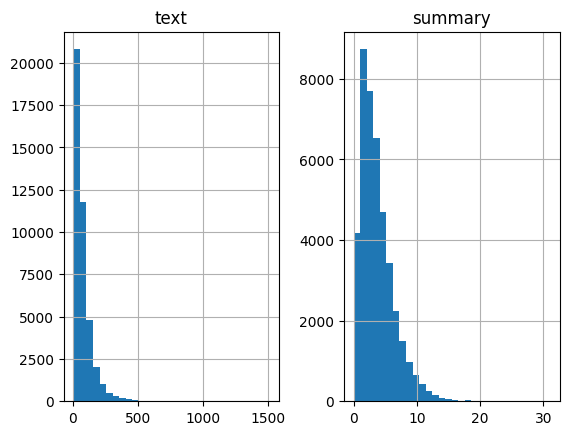

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r"C:\summarizetext\amazonFood.csv")

# Fill nulls (optional but useful for safety)
df['Text'] = df['Text'].fillna('')
df['Summary'] = df['Summary'].fillna('')

# Clean the text and summary columns (very basic cleaning shown here)
def preprocess_text(text):
    return ' '.join(text.lower().split())

df['Cleaned_Text'] = df['Text'].apply(preprocess_text)
df['Cleaned_Summary'] = df['Summary'].apply(preprocess_text)

# Rename for convenience
reviewsData = df

# Count words
text_word_count = [len(text.split()) for text in reviewsData['Cleaned_Text']]
summary_word_count = [len(summary.split()) for summary in reviewsData['Cleaned_Summary']]

# Create dataframe and plot
length_df = pd.DataFrame({'text': text_word_count, 'summary': summary_word_count})
length_df.hist(bins=30)
plt.show()


In [6]:
# Calculate % of reviews with <=35 words
short_reviews = sum(1 for text in reviewsData['Cleaned_Text'] if len(text.split()) <= 35)
percentage_short = short_reviews / len(reviewsData['Cleaned_Text'])

print(f"Percentage of reviews with ≤35 words: {percentage_short:.1%}")  # Formatted as %

Percentage of reviews with ≤35 words: 27.6%


In [7]:
#Function for getting the Maximum Summary length
count=0
for i in reviewsData['Cleaned_Summary']:
    if(len(i.split())<=8):
        count=count+1
print(count/len(reviewsData['Cleaned_Summary']))

0.9346439702709183


In [8]:
#From the above data we got an idea about maximum lengths of review and summary
max_text_len = 35
max_summary_len = 8

In [9]:
#Adding START and END tags to summary for better decoding
import numpy as np
import pandas as pd
cleaned_text =np.array(reviewsData['Cleaned_Text'])
cleaned_summary=np.array(reviewsData['Cleaned_Summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [33]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [10]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.2,random_state=0,shuffle=True)

In [1]:
%pip install keras
%pip install --upgrade keras tensorflow



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load your data into a DataFrame
reviewsData = pd.read_csv(r'C:\summarizetext\amazonFood.csv')  # Use raw string notation
# Print the columns to check their names
print("Columns in DataFrame:", reviewsData.columns.tolist())
# Strip whitespace from column names
reviewsData.columns = reviewsData.columns.str.strip()
# Check the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(reviewsData.head())
# Check if the expected columns exist
if 'Cleaned_Text' in reviewsData.columns and 'Cleaned_Summary' in reviewsData.columns:
    # Assuming 'Cleaned_Text' and 'Cleaned_Summary' are in your DataFrame
    X = reviewsData['Cleaned_Text']     # input reviews
    y = reviewsData['Cleaned_Summary']  # target summaries
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
    # Print the shapes of the resulting sets
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}")
else:
    print("Expected columns 'Cleaned_Text' or 'Cleaned_Summary' not found in the DataFrame.")

Columns in DataFrame: ['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text']
First few rows of the DataFrame:
    ProductId          UserId  \
0  B001E4KFG0  A3SGXH7AUHU8GW   
1  B00813GRG4  A1D87F6ZCVE5NK   
2  B000LQOCH0   ABXLMWJIXXAIN   
3  B000UA0QIQ  A395BORC6FGVXV   
4  B006K2ZZ7K  A1UQRSCLF8GW1T   

                                         productName  Score  \
0        Dogswell Vitality Canned Dog Food Case Duck      5   
1  Southern Grove Premium Quality Roasted and Sal...      1   
2  Turkish Delight Filbert (Hazelnuts) (Sultan) 1...      4   
3  Faeries Finest Flavor Extract, Cherry, 2.04 Ounce      2   
4                 Salt Water Taffy - Assorted, 5 lbs      5   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been aroun

In [37]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Step 1: Import and prepare your data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

# Load your data
reviewsData = pd.read_csv('amazonFood.csv')

# Check available columns
print("Columns in the dataset:", reviewsData.columns.tolist())

# Based on typical Amazon review datasets, we'll use:
# X = Text (probably 'Text' or 'Review')
# y = Summary (probably 'Summary' or 'Score')
# ADJUST THESE BASED ON YOUR ACTUAL COLUMN NAMES!

# For example, if your columns are 'Text' and 'Summary':
X = reviewsData['Text']  # The full review text
y = reviewsData['Summary']  # The summary/headline

# If those column names don't exist, use the correct ones from your print output

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Step 3: Fit tokenizer
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

# Step 4: Analyze rare words
thresh = 4

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key, value in X_tokenizer.word_counts.items():
    tot_cnt += 1
    tot_freq += value
    if value < thresh:
        cnt += 1
        freq += value

print("% of rare words in vocabulary:", round((cnt / tot_cnt) * 100, 2))
print("Total Coverage of rare words:", round((freq / tot_freq) * 100, 2))

Columns in the dataset: ['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text']
% of rare words in vocabulary: 62.74
Total Coverage of rare words: 1.11


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming X_train and X_test are already defined

# 1. Prepare Tokenizer
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

# 2. Convert text to sequences
X_train_seq = X_tokenizer.texts_to_sequences(X_train) 
X_test_seq = X_tokenizer.texts_to_sequences(X_test)

# 3. Calculate max_text_len (longest sequence in training data)
max_text_len = max(len(seq) for seq in X_train_seq)
print(f"Maximum sequence length: {max_text_len}")

# Alternatively, set a fixed max length (e.g., 200) if sequences are too long:
# max_text_len = 200  

# 4. Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_text_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_text_len, padding='post')

# 5. Vocabulary size (+1 for padding token)
X_voc = len(X_tokenizer.word_index) + 1
print(f"Vocabulary size: {X_voc}")

Maximum sequence length: 1565
Vocabulary size: 37907


In [12]:
X_voc 

37907

In [14]:
import pandas as pd
import numpy as np

# 1. Convert all summaries to strings and handle missing values
y_train = y_train.astype(str)  # Convert everything to string
y_train = y_train.replace('nan', '')  # Replace NaN strings with empty strings

# 2. Now apply the tokenizer
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

# 3. Optional: Verify the most common words
print("Top summary words:", list(y_tokenizer.word_counts.items())[:10])

Top summary words: [('yummy', 682), ('tea', 1541), ("didn't", 84), ('work', 103), ('for', 2751), ('me', 324), ('emergen', 2), ('c', 37), ('too', 666), ('easily', 19)]


In [15]:
#Rarewords and their coverage in summary

thresh = 6  ##If a word whose count is less than threshold i.e 6, then it's considered as rare word 

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt+1
    tot_freq = tot_freq+value
    if(value<thresh):
        cnt = cnt+1
        freq = freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 77.1282575370465
Total Coverage of rare words: 8.31589048683253


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# First ensure y_train and y_test contain strings (not floats/nan)
y_train = y_train.astype(str).replace('nan', '')
y_test = y_test.astype(str).replace('nan', '')

# Prepare tokenizer for summaries
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

# Convert text to sequences
y_train_seq = y_tokenizer.texts_to_sequences(y_train) 
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

# Calculate maximum summary length (from training data)
max_summary_len = max(len(seq) for seq in y_train_seq)
print(f"Maximum summary length: {max_summary_len}")

# Alternatively set a fixed maximum length if needed:
# max_summary_len = 20  # Typical for summaries

# Pad sequences
y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

# Vocabulary size (+1 for padding token)
y_voc = len(y_tokenizer.word_index) + 1
print(f"Summary vocabulary size: {y_voc}")

Maximum summary length: 30
Summary vocabulary size: 9786


In [19]:
y_voc

9786

In [45]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# First, let's examine the available columns in your dataset
print("Available columns:", reviewsData.columns.tolist())

# Based on typical Amazon review datasets, the columns are likely called:
# For the full text: 'Text', 'Review', or 'ReviewText'
# For the summary: 'Summary' or 'Headline'

# Let's use these (adjust if your column names are different)
text_column = 'Text'  # Change this to your actual text column name
summary_column = 'Summary'  # Change this to your actual summary column name

# Clean the data first
reviewsData[summary_column] = reviewsData[summary_column].astype(str).replace('nan', '')

# Add special tokens to summaries
reviewsData['processed_summary'] = reviewsData[summary_column].apply(
    lambda x: 'sostok ' + x + ' eostok' if x.strip() != '' else ''
)

# Split the data
X = reviewsData[text_column]
y = reviewsData['processed_summary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1, 
    random_state=0
)

# Fit tokenizer on summaries
y_tokenizer = Tokenizer(filters='', lower=False)  # Preserve case and special tokens
y_tokenizer.fit_on_texts(y_train.tolist())

# Verify special tokens
print("\nSpecial tokens verification:")
print("'sostok' index:", y_tokenizer.word_index.get('sostok', 'Not found'))
print("'eostok' index:", y_tokenizer.word_index.get('eostok', 'Not found'))
print("Vocabulary size:", len(y_tokenizer.word_index))

# Print some statistics
print("\nTraining data stats:")
print("Number of training samples:", len(X_train))
print("Example summary with tokens:", y_train.iloc[0])

Available columns: ['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text']

Special tokens verification:
'sostok' index: 1
'eostok' index: 2
Vocabulary size: 22021

Training data stats:
Number of training samples: 37539
Example summary with tokens: sostok Yummy tea! eostok


In [47]:
%pip install lxml


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load your data (adjust the path as needed)
reviewsData = pd.read_csv('amazonFood.csv', nrows=100000)  # Adjust rows if needed

# Dropping null values and duplicates
reviewsData.drop_duplicates(subset=['Text'], inplace=True)
reviewsData.dropna(axis=0, inplace=True)

# Function to clean text
def clean_text(text, remove_stopwords=True):
    text = str(text).lower()
    text = BeautifulSoup(text, "html.parser").text  # Use 'html.parser' if lxml is not available
    text = re.sub(r'\([^)]*\)', '', text)  # Remove content inside parentheses
    text = re.sub('"','', text)  # Remove double quotes
    text = re.sub(r"'s\b", "", text)  # Remove possessive 's
    text = re.sub("[^a-zA-Z]", " ", text)  # Remove non-alphabet characters
    text = re.sub('[m]{2,}', 'mm', text)  # Correct double 'm' occurrences

    if remove_stopwords:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        text = ' '.join(text.split())
        
    return text

# Cleaned versions of text and summary
cleaned_text = [clean_text(t, remove_stopwords=True) for t in reviewsData['Text']]
cleaned_summary = [clean_text(t, remove_stopwords=False) for t in reviewsData['Summary']]

# Add START and END tokens to summaries
cleaned_summary = ['<sostok> ' + s + ' <eostok>' for s in cleaned_summary]

# Add cleaned columns to dataframe
reviewsData['Cleaned_Text'] = cleaned_text
reviewsData['Cleaned_Summary'] = cleaned_summary

# Drop empty summaries
reviewsData['Cleaned_Summary'].replace('<sostok>  <eostok>', np.nan, inplace=True)
reviewsData.dropna(axis=0, inplace=True)

# Optional: print sample cleaned text
print(reviewsData[['Cleaned_Text', 'Cleaned_Summary']].head(3))

# Tokenization using TensorFlow's Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set vocabulary size and max lengths
max_text_len = 80
max_summary_len = 10
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(reviewsData['Cleaned_Text']))
x_tr_seq = x_tokenizer.texts_to_sequences(reviewsData['Cleaned_Text'])
x_tr = pad_sequences(x_tr_seq, maxlen=max_text_len, padding='post')

y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(reviewsData['Cleaned_Summary']))
y_tr_seq = y_tokenizer.texts_to_sequences(reviewsData['Cleaned_Summary'])
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')

# Split dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=0.1, random_state=42)

# Remove samples where summary only has START and END tokens (no content)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Remove meaningless summaries
meaningful_indices = [i for i in range(len(y_train)) if np.count_nonzero(y_train[i]) > 2]

X_train = X_train[meaningful_indices]
y_train = y_train[meaningful_indices]

# Final check: print the shape of training data
print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6076\1300252685.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviewsData['Cleaned_Summary'].replace('<sostok>  <eostok>', np.nan, inplace=True)


                                        Cleaned_Text  \
0  bought several vitality canned dog food produc...   
1  product arrived labeled jumbo salted peanuts p...   
2  confection around centuries light pillowy citr...   

                           Cleaned_Summary  
0  <sostok> good quality dog food <eostok>  
1      <sostok> not as advertised <eostok>  
2    <sostok> delight says it all <eostok>  
Final X_train shape: (35415, 80)
Final y_train shape: (35415, 10)


In [23]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re

# Assuming x_tr and y_tr are your input and output data
# Sample data for demonstration (replace with your actual data)
x_tr = ['This is a text sample.', 'Another example text.']
y_tr = ['Summary of text 1', 'Summary of text 2']

# Function to clean the text
def clean_text(text, remove_stopwords=True):
    text = str(text).lower()
    text = BeautifulSoup(text, "html.parser").text  # Use 'html.parser' if lxml is not available
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"', '', text)
    text = re.sub(r"'s\b", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = re.sub('[m]{2,}', 'mm', text)

    if remove_stopwords:
        # You need to define the stop_words list or load it from a package (e.g., NLTK or SpaCy)
        stop_words = set()  # Replace with actual stopwords list
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        text = ' '.join(text.split())
        
    return text

# Clean the texts
x_tr_clean = [clean_text(text) for text in x_tr]
y_tr_clean = [clean_text(text) for text in y_tr]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_tr_clean, y_tr_clean, test_size=0.1, random_state=42)

# Initialize tokenizers for both input (X) and target (y)
X_tokenizer = Tokenizer()
y_tokenizer = Tokenizer()

# Fit the tokenizers on the cleaned texts
X_tokenizer.fit_on_texts(X_train)
y_tokenizer.fit_on_texts(y_train)

# Convert text summaries to sequences
y_test_seq = y_tokenizer.texts_to_sequences(y_test)
X_test_seq = X_tokenizer.texts_to_sequences(X_test)

# Define max length based on your earlier analysis (example: 8 for summaries, 30 for input text)
max_summary_len = 8
max_text_len = 30

# Pad the sequences to ensure equal length for all sequences
y_test_pad = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_text_len, padding='post')

# Remove rows with empty or too short target summaries (i.e., only 'sostok' and 'eostok' = 2 tokens)
ind = []
for i in range(len(y_test_pad)):
    if np.count_nonzero(y_test_pad[i]) <= 2:
        ind.append(i)

# Remove the identified indices
y_test_pad = np.delete(y_test_pad, ind, axis=0)
X_test_pad = np.delete(X_test_pad, ind, axis=0)

# Check the shapes of the padded sequences
print("X_test_pad shape:", X_test_pad.shape)
print("y_test_pad shape:", y_test_pad.shape)

# Optionally, you can visualize the tokenized text
print("Example tokenized X_test:", X_test_pad[:3])
print("Example tokenized y_test:", y_test_pad[:3])


X_test_pad shape: (1, 30)
y_test_pad shape: (1, 8)
Example tokenized X_test: [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Example tokenized y_test: [[1 2 3 0 0 0 0 0]]


In [1]:
%pip install transformers sentencepiece


   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   ------------------------------- -------- 786.4/991.5 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 991.5/991.5 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import streamlit as st
from transformers import pipeline

@st.cache_resource
def load_abstractive_model():
    return pipeline("summarization", model="facebook/bart-large-cnn")

summarizer = load_abstractive_model()



2025-05-16 00:42:32.677 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 00:42:32.844 
  command:

    streamlit run c:\summarizetext\myenv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-16 00:42:32.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 00:42:32.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 00:42:33.361 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 00:42:33.364 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
Device set to use cpu
2025-05-16 00:42:34.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-16 00:42:34.390 Thread 

In [5]:
def generate_abstractive_summary(text, max_length=130, min_length=30):
    if len(text.strip().split()) < 30:
        return "Text too short for abstractive summarization."

    summary_output = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
    return summary_output[0]['summary_text']


In [24]:
#Model Building

#Adding Custom Attention layer 

import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [52]:
%pip install pydot
%pip install graphviz


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, AdditiveAttention, Concatenate, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam

# Define necessary variables
embedding_dim = 256  # Embedding dimension for words
latent_dim = 512  # Latent dimension for LSTM
y_voc = 10000  # Vocabulary size for the target language (for example, 10,000 words)
x_voc = 10000  # Vocabulary size for the input language (for example, 10,000 words)
state_h, state_c = [Input(shape=(latent_dim,)) for _ in range(2)]  # Encoder hidden and cell states

# Assuming encoder inputs and outputs are defined
encoder_inputs = Input(shape=(None,))  # Encoder input (sequence of integers)
encoder_embedding = Embedding(input_dim=x_voc, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True, dropout=0.4, recurrent_dropout=0.2)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# Decoder setup using encoder states as initial state
decoder_inputs = Input(shape=(None,))  # Decoder input with variable sequence length

# Embedding layer for the decoder
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Attention layer using AdditiveAttention
attn_layer = AdditiveAttention(name='attention_layer')
attn_out = attn_layer([decoder_outputs, encoder_outputs])  # Correct order: decoder_outputs first, then encoder_outputs

# Concatenate Attention output and Decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# Dense layer to output final predictions
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Defining the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model (make sure you define the optimizer and loss function for training)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, None, 256) │  2,560,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 256) │  2,560,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 512),     │  1,574,912 │ embedding[0][0]   │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │  1,574,912 │ embedding_1[0][0… │
│                     │ 512), (None,      │            │ lstm[0][1],       │
│                     │ 512), (None,      │            │ lstm[0][2]        │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 512) │        512 │ lstm_1[0][0],     │
│ (AdditiveAttention) │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None,      │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │ 1024)             │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, None,      │ 10,250,000 │ concat_layer[0][… │
│ (TimeDistributed)   │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,520,336 (70.65 MB)

 Trainable params: 18,520,336 (70.65 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
%pip install graphviz


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [26]:
#Adding Metrics
model.compile(optimizer='rmsprop' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [2]:
from tensorflow.keras.callbacks import EarlyStopping

#Adding Callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [58]:
%pip install tensorflow==1.15


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==1.15


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, AdditiveAttention, Concatenate, TimeDistributed, Dense

# Step 1: Read the CSV dataset
dataset_path = 'C:/summarizetext/amazonFood.csv'
df = pd.read_csv(dataset_path)

# Step 2: Preprocess the data
# Check if the column names exist and handle missing columns
if 'Text' not in df.columns or 'Summary' not in df.columns:
    raise ValueError("The required columns 'Text' or 'Summary' are missing in the dataset.")

# Use the correct column names: 'Text' for review text and 'Summary' for the summary
text_data = df['Text'].dropna().tolist()  # Remove NaN values and get review text
summary_data = df['Summary'].dropna().tolist()  # Remove NaN values and get summaries

# Step 3: Tokenization
# Tokenize the text data
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(text_data)
X_seq = X_tokenizer.texts_to_sequences(text_data)
X_pad = pad_sequences(X_seq, maxlen=30, padding='post')  # Set your max length based on data

# Tokenize the summary data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(summary_data)
y_seq = y_tokenizer.texts_to_sequences(summary_data)
y_pad = pad_sequences(y_seq, maxlen=8, padding='post')  # Set your max length based on data

# Step 4: Ensure both X_pad and y_pad have the same length
min_length = min(len(X_pad), len(y_pad))  # Get the smaller length
X_pad = X_pad[:min_length]  # Trim X_pad
y_pad = y_pad[:min_length]  # Trim y_pad

# Step 5: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_pad, test_size=0.2, random_state=42)

# Get vocabulary sizes
X_voc = len(X_tokenizer.word_index) + 1  # Add 1 for padding token
y_voc = len(y_tokenizer.word_index) + 1  # Add 1 for padding token

# Embedding dimensions
embedding_dim = 256
latent_dim = 512

# Encoder setup
encoder_inputs = Input(shape=(None,))  # Variable-length input sequence
enc_emb_layer = Embedding(X_voc, embedding_dim, trainable=True)  # Encoder embedding layer
enc_emb = enc_emb_layer(encoder_inputs)

# Encoder LSTM
encoder_lstm = LSTM(latent_dim, return_state=True, dropout=0.4, recurrent_dropout=0.2)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# Decoder setup
decoder_inputs = Input(shape=(None,))  # Variable-length output sequence (summary)
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM with initial state from encoder
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Attention Layer
attn_layer = AdditiveAttention(name='attention_layer')
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# Concatenate Attention output with Decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# Dense layer to predict the output
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Final model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Summarize the model
model.summary()

# Step 6: Compile the model before training
model.compile(
    optimizer='adam',  # You can use 'adam' or another optimizer
    loss='sparse_categorical_crossentropy',  # For sequence generation tasks like summarization
    metrics=['accuracy']
)

# Step 7: Train the model
history = model.fit(
    [X_train, y_train[:, :-1]],  # Decoder input (remove last token from y_train)
    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],  # Decoder output (remove first token from y_train)
    epochs=50,
    batch_size=64,
    validation_data=([X_test, y_test[:, :-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:, 1:])
)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 256) │ 10,200,576 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 256) │  2,649,600 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 512),     │  1,574,912 │ embedding_2[0][0] │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │  1,574,912 │ embedding_3[0][0… │
│                     │ 512), (None,      │            │ lstm_2[0][1],     │
│                     │ 512), (None,      │            │ lstm_2[0][2]      │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, None, 512) │        512 │ lstm_3[0][0],     │
│ (AdditiveAttention) │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, None,      │          0 │ lstm_3[0][0],     │
│ (Concatenate)       │ 1024)             │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, None,      │ 10,608,750 │ concat_layer[0][… │
│ (TimeDistributed)   │ 10350)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,609,262 (101.51 MB)

 Trainable params: 26,609,262 (101.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.5767 - loss: 3.5380 - val_accuracy: 0.5948 - val_loss: 2.8990
Epoch 2/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 580s 1s/step - accuracy: 0.5997 - loss: 2.7483 - val_accuracy: 0.6126 - val_loss: 2.6836
Epoch 3/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.6211 - loss: 2.4313 - val_accuracy: 0.6249 - val_loss: 2.5609
Epoch 4/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.6318 - loss: 2.2208 - val_accuracy: 0.6312 - val_loss: 2.5117
Epoch 5/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.6485 - loss: 1.9962 - val_accuracy: 0.6336 - val_loss: 2.4846
Epoch 6/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 586s 1s/step - accuracy: 0.6627 - loss: 1.8094 - val_accuracy: 0.6363 - val_loss: 2.4798
Epoch 7/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 594s 1s/step - accuracy: 0.6799 - loss: 1.6386 - val_accuracy: 0.6394 - val_loss: 2.4796
Epoch 8/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 3491s 7s/step - accuracy: 0.6980 - loss: 1.4973 - val_acc

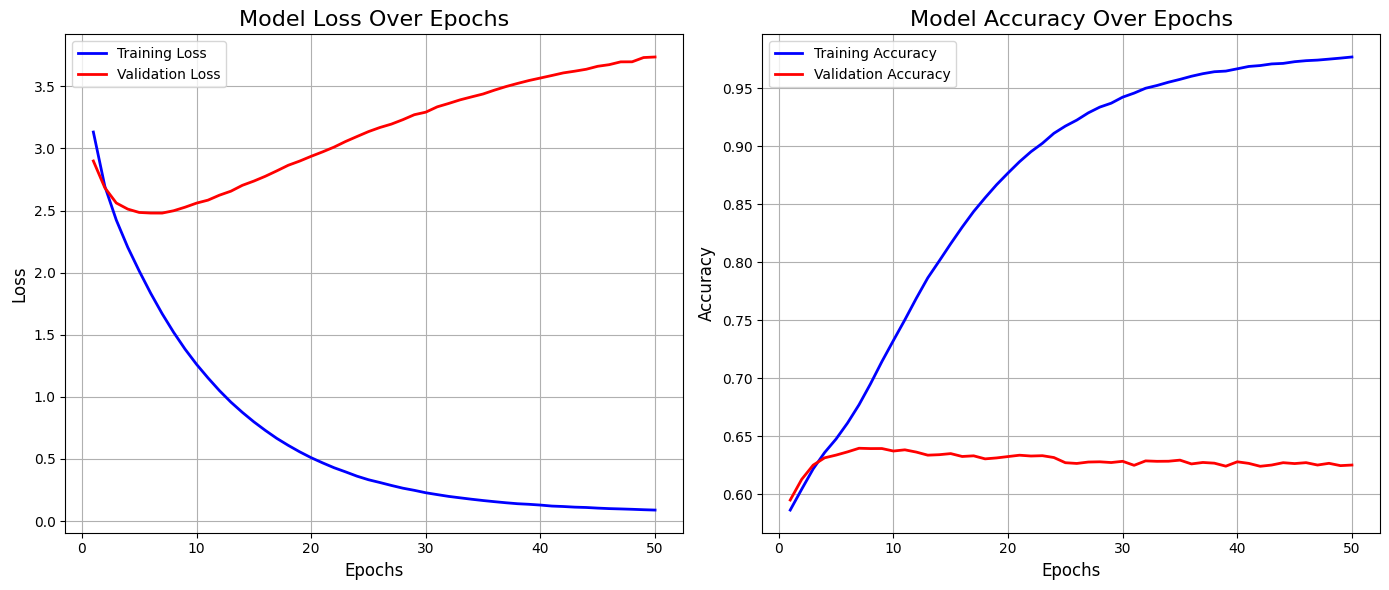

In [29]:
import matplotlib.pyplot as plt

# Extract training history
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, color='blue', label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, color='red', label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, color='blue', label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, color='red', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


In [30]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Sample data (replace with your actual dataset)
input_texts = ["I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most"]
output_texts = ["Good Quality Dog Food"]

# 1. Preprocess the data (Tokenization)
input_tokenizer = Tokenizer()
output_tokenizer = Tokenizer()

input_tokenizer.fit_on_texts(input_texts)
output_tokenizer.fit_on_texts(output_texts)

input_sequences = input_tokenizer.texts_to_sequences(input_texts)
output_sequences = output_tokenizer.texts_to_sequences(output_texts)

# Pad sequences to have uniform length
max_encoder_seq_length = max([len(seq) for seq in input_sequences])
max_decoder_seq_length = max([len(seq) for seq in output_sequences])

encoder_input_data = pad_sequences(input_sequences, maxlen=max_encoder_seq_length, padding='post')
decoder_input_data = pad_sequences(output_sequences, maxlen=max_decoder_seq_length, padding='post')

# Decoder target data (the decoder target is the same as the decoder input but shifted by one time step)
decoder_target_data = np.zeros_like(decoder_input_data)
decoder_target_data[:, 0:-1] = decoder_input_data[:, 1:]

# 2. Define the model architecture (Encoder-Decoder Model)
latent_dim = 256  # Dimensionality of the encoding space

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=len(input_tokenizer.word_index) + 1, output_dim=latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# Store the states of the encoder to pass them to the decoder
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=len(output_tokenizer.word_index) + 1, output_dim=latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(len(output_tokenizer.word_index) + 1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 3. Compile the model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=64,
    epochs=10,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

# 5. Inference: Generating Summary for a new input
def generate_summary(input_sequence):
    # Encode the input sequence using the encoder model
    encoder_model = Model(encoder_inputs, encoder_states)
    # The encoder model predicts the states
    states = encoder_model.predict(input_sequence)
    state_h, state_c = states

    # Prepare the initial input for the decoder (usually the start token)
    decoder_input_sequence = np.zeros((1, 1))  # This is usually a start token (e.g., <start>)

    # Initialize an empty list to store the generated summary
    summary = []

   # 5. Inference: Generating Summary for a new input
def generate_summary(input_sequence):
    # Encode the input sequence using the encoder model
    encoder_model = Model(encoder_inputs, encoder_states)
    # The encoder model predicts the states
    states = encoder_model.predict(input_sequence)
    state_h, state_c = states

    # Prepare the initial input for the decoder (usually the start token)
    decoder_input_sequence = np.zeros((1, 1))  # This is usually a start token (e.g., <start>)

    # Initialize an empty list to store the generated summary
    summary = []

    # Generate the summary word by word
    for _ in range(50):  # Set max length of the summary
        # Predict the next token from the decoder model
        decoder_model = Model([decoder_inputs] + encoder_states, decoder_outputs)
        decoder_output = decoder_model.predict(
            [decoder_input_sequence] + [state_h, state_c]  # Pass state inputs to decoder
        )

        # Get the index of the predicted word
        predicted_word = np.argmax(decoder_output[0, -1, :])

        # Break if end token is predicted
        if predicted_word == output_tokenizer.word_index.get('<end>', None):  # Check if end token
            break

        # Append the predicted word to the summary
        summary.append(predicted_word)

        # Update the decoder input for the next prediction
        decoder_input_sequence = np.reshape([predicted_word], (1, 1))  # Reshape for next prediction

        # Update the states for the next prediction step
        state_h, state_c = decoder_output[1], decoder_output[2]  # Extract new states

    # Convert the predicted indices back to words
    summary_words = output_tokenizer.sequences_to_texts([summary])
    return ' '.join(summary_words[0])



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 1.6076
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 1.5575
Epoch 3/10


c:\summarizetext\myenv\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 1.5142
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 1.4653
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 1.3989
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 1.2653
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.7500 - loss: 0.9589
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2500 - loss: 1.2686
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5000 - loss: 0.9809
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7500 - loss: 0.8960


In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Sample dimensions — replace with your actual input shape
encoder_inputs = Input(shape=(None, 300))  # e.g., 300-dim word vectors
encoder = LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 300))
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(10000, activation='softmax')  # assume 10k words in vocab
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Dummy data — replace with your actual preprocessed inputs
import numpy as np
encoder_input_data = np.random.rand(100, 20, 300)   # (samples, timesteps, features)
decoder_input_data = np.random.rand(100, 20, 300)
decoder_target_data = np.random.rand(100, 20, 10000)

from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - loss: 46089.9609 - val_loss: 46125.2461
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 46132.1211 - val_loss: 46164.8516
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 46181.0859 - val_loss: 46177.7578


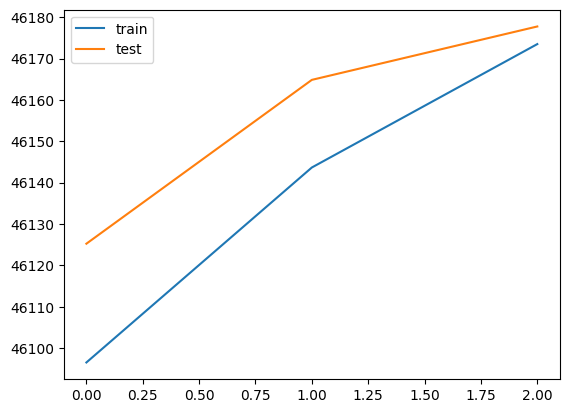

In [32]:
import matplotlib.pyplot as plt

# Visualizing Loss
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend() 
plt.show()


In [33]:
# Example source texts (replace with your actual data)
source_texts = [
    "Hello, how are you?",
    "I am learning to code.",
    "This is a machine learning model."
]

# Example of initializing a tokenizer for the source vocabulary
from tensorflow.keras.preprocessing.text import Tokenizer

X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(source_texts)  # source_texts is your input data

# Reverse dictionaries for source and target vocabulary
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = X_tokenizer.index_word
target_word_index = y_tokenizer.word_index


In [79]:
%pip install numpy tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
%pip install tensorflow numpy pickle


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed

# Example: Build a simple Seq2Seq model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=256, input_length=80))  # Adjust based on your data
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(10000, activation='softmax')))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# After training the model
# Save the models in the Keras format instead of HDF5
model.save('encoder_model.keras')  # Save the encoder model
model.save('decoder_model.keras')  # Save the decoder model



c:\summarizetext\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\summarizetext\myenv\Lib\site-packages\keras\src\saving\saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle


# Example: your training texts
texts = [
    "I love machine learning",
    "Deep learning is great",
    "Text tokenization is important"
]

# Create tokenizer
tokenizer = Tokenizer(num_words=10000)  # limit vocabulary size if needed
tokenizer.fit_on_texts(texts)

# Save tokenizer to file
with open('x_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [7]:
from keras.preprocessing.sequence import pad_sequences
import pickle

# Load tokenizer
with open('x_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Your new raw test texts
new_texts = [
    "I love deep learning",
    "Tokenization helps NLP"
]

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(new_texts)

# Pad sequences to the max length used in training (e.g., maxlen=10)
X_test = pad_sequences(sequences, maxlen=10, padding='post')

print(X_test)


[[3 4 6 1 0 0 0 0 0 0]
 [9 0 0 0 0 0 0 0 0 0]]


In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Dimensions
latent_dim = 256
num_encoder_tokens = 1000
num_decoder_tokens = 1000

# Input lengths
max_encoder_seq_length = 20
max_decoder_seq_length = 20

# Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Training model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
encoder_model = Model(encoder_inputs, encoder_states)


In [20]:
# Decoder states input
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Decoder with previous states
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs
)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)


In [38]:
#Function defining the implementation of inference process
def decode_sequence(input_seq):
    #Encoding the input as state vectors
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))
    
    #Populating the first word of target sequence with the start word
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        #Sampling a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        #Exit condition: either hit max length or find stop word
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        #Updating the target sequence (of length 1)
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        #Updating internal states
        e_h, e_c = h, c

    return decoded_sentence

In [39]:
#Functions to convert an integer sequence to a word sequence for summary as well as reviews 
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [40]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.preprocessing.text import Tokenizer

# ---------------- Path Configuration ----------------

BASE_PATH = r'C:\summarizetext'

encoder_path = os.path.join(BASE_PATH, 'encoder_model.h5')
decoder_path = os.path.join(BASE_PATH, 'decoder_model.h5')
tokenizer_path = os.path.join(BASE_PATH, 'y_tokenizer.pkl')

# ---------------- File Check ----------------

if not os.path.exists(encoder_path):
    raise FileNotFoundError(f"{encoder_path} is missing!")
if not os.path.exists(decoder_path):
    raise FileNotFoundError(f"{decoder_path} is missing!")
if not os.path.exists(tokenizer_path):
    raise FileNotFoundError(f"{tokenizer_path} is missing!")

# ---------------- Load Models ----------------

encoder_model = load_model(encoder_path)
decoder_model = load_model(decoder_path)

# Recompile models to enable metrics and suppress warnings
encoder_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
decoder_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---------------- Load Tokenizer ----------------

with open(tokenizer_path, 'rb') as f:
    y_tokenizer = pickle.load(f)

# ---------------- Configuration ----------------

max_text_len = 80
max_summary_len = 10

# Example data
X_train_texts = ["This is an example input sequence."] * 100
y_train_texts = ["This is a summary."] * 100

# Input tokenizer
input_tokenizer = Tokenizer()
input_tokenizer.fit_on_texts(X_train_texts)

X_train = input_tokenizer.texts_to_sequences(X_train_texts)
y_train = y_tokenizer.texts_to_sequences(y_train_texts)

X_train_pad = pad_sequences(X_train, maxlen=max_text_len, padding='post')

# ---------------- Decoding Function ----------------

def decode_sequence(input_seq):
    # Encode the input
    encoder_outputs = encoder_model.predict(input_seq)

    # Handle state extraction
    if isinstance(encoder_outputs, list):
        states_value = encoder_outputs[1:]  # Assuming the first output is the encoder output
    else:
        states_value = encoder_outputs

    # Prepare decoder input with 'sostok'
    decoder_input = np.zeros((1, 1))  # Shape (1, 1) for batch size of 1 and 1 timestep
    start_index = y_tokenizer.word_index.get('sostok')
    if start_index is None:
        raise ValueError("'sostok' not found in tokenizer")
    decoder_input[0, 0] = start_index

    decoded_words = []

    for _ in range(max_summary_len):
        # Ensure states_value is correctly shaped
        output_tokens, h, c = decoder_model.predict([decoder_input] + states_value)

        sampled_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = y_tokenizer.index_word.get(sampled_index, '')

        if sampled_word == 'eostok' or sampled_word == '':
            break

        decoded_words.append(sampled_word)

        # Prepare next input
        decoder_input = np.zeros((1, 1))  # Reset decoder input for the next timestep
        decoder_input[0, 0] = sampled_index

        states_value = [h, c]  # Update states for the next timestep

    return ' '.join(decoded_words)


In [37]:
def decode_sequence(input_seq):
    # Step 1: Encode input sequence
    encoder_outputs = encoder_model.predict(input_seq)

    # Extract states depending on encoder model structure
    if isinstance(encoder_outputs, list):
        states_value = encoder_outputs[1:]  # Assuming [output, state_h, state_c]
    else:
        states_value = encoder_outputs  # If it's just the states

    # Step 2: Start with 'sostok'
    decoder_input = np.zeros((1, 1))
    start_token = y_tokenizer.word_index.get('sostok')
    if start_token is None:
        raise ValueError("'sostok' not found in y_tokenizer.word_index")
    decoder_input[0, 0] = start_token

    decoded_sentence = []

    for _ in range(max_summary_len):
        # Get decoder output and states
        output_tokens, state_h, state_c = decoder_model.predict([decoder_input] + states_value)

        # Get the predicted token index
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = y_tokenizer.index_word.get(sampled_token_index, '')

        # If end token or empty token is generated, stop decoding
        if sampled_token == 'eostok' or sampled_token == '':
            break

        decoded_sentence.append(sampled_token)

        # Update input and states for the next iteration
        decoder_input = np.zeros((1, 1))
        decoder_input[0, 0] = sampled_token_index
        states_value = [state_h, state_c]

    return ' '.join(decoded_sentence)


In [38]:
def seq2summary(sequence):
   
    summary = []
    for index in sequence:
        word = y_tokenizer.index_word.get(index, '')  # Map index to word
        if word == 'eostok':  # If we encounter the end-of-sequence token
            break
        if word:  # Skip empty words (like padding)
            summary.append(word)
    return summary


In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import warnings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
from nltk.corpus import stopwords

warnings.filterwarnings("ignore")

# 1. Load the dataset
data = pd.read_csv('amazonFood.csv')

# 2. Drop missing values in required columns
data = data.dropna(subset=['Text', 'Summary'])

# 3. Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)            # Remove HTML tags
    text = re.sub(r'\d+', '', text)              # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)          # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()     # Remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# 4. Apply preprocessing
data['clean_text'] = data['Text'].apply(preprocess_text)
data['clean_summary'] = data['Summary'].apply(preprocess_text)

# 5. Add START and END tokens to summaries
data['clean_summary'] = data['clean_summary'].apply(lambda x: '_START_ ' + x + ' _END_')

# 6. Set maximum lengths
max_text_len = 80
max_summary_len = 10

# 7. Filter out long sequences
data = data[(data['clean_text'].str.split().str.len() <= max_text_len) &
            (data['clean_summary'].str.split().str.len() <= max_summary_len)]

# 8. Prepare sequences
x = data['clean_text']
y = data['clean_summary']

# 9. Split into training and validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

# 10. Tokenize text
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

x_train_seq = x_tokenizer.texts_to_sequences(x_train)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

x_train_seq = pad_sequences(x_train_seq, maxlen=max_text_len, padding='post')
x_val_seq = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

x_vocab_size = len(x_tokenizer.word_index) + 1

# 11. Tokenize summary
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

y_train_seq = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_val_seq = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

y_vocab_size = len(y_tokenizer.word_index) + 1

# Ready for model training!

print(f"Text Vocabulary Size: {x_vocab_size}")
print(f"Summary Vocabulary Size: {y_vocab_size}")
print(f"x_train shape: {x_train_seq.shape}, y_train shape: {y_train_seq.shape}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Vocabulary Size: 43578
Summary Vocabulary Size: 9059
x_train shape: (33763, 80), y_train shape: (33763, 10)


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
import numpy as np

# Rebuild reverse index safely
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word

def seq2summary(seq):
    return ' '.join([reverse_target_word_index.get(i, '') for i in seq if i != 0])

def seq2text(seq):
    return ' '.join([reverse_source_word_index.get(i, '') for i in seq if i != 0])

# Dummy decode function for test purposes
def decode_sequence(input_seq):
    return seq2text(input_seq[0]).split()[:10]  # Replace with actual decoding from model

# BLEU score calculation
scores_1gram, scores_2gram, scores_3gram, scores_4gram = [], [], [], []

for i in range(100):
    reference = [seq2summary(y_train_seq[i]).split()]
    candidate = decode_sequence(x_train_seq[i].reshape(1, max_text_len))

    scores_1gram.append(sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
    scores_2gram.append(sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
    scores_3gram.append(sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
    scores_4gram.append(sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

print('Avg Cumulative 1-gram BLEU:', np.mean(scores_1gram))
print('Avg Cumulative 2-gram BLEU:', np.mean(scores_2gram))
print('Avg Cumulative 3-gram BLEU:', np.mean(scores_3gram))
print('Avg Cumulative 4-gram BLEU:', np.mean(scores_4gram))


Avg Cumulative 1-gram BLEU: 0.07144444444444445
Avg Cumulative 2-gram BLEU: 0.022627951217978354
Avg Cumulative 3-gram BLEU: 0.007659224460442453
Avg Cumulative 4-gram BLEU: 0.006555056403429288


In [4]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('amazonFood.csv')

# Print column names to identify correct label column
print("Columns in dataset:", df.columns)

# Check a few rows
print(df.head())


Columns in dataset: Index(['ProductId', 'UserId', 'productName', 'Score', 'Summary', 'Text'], dtype='object')
    ProductId          UserId  \
0  B001E4KFG0  A3SGXH7AUHU8GW   
1  B00813GRG4  A1D87F6ZCVE5NK   
2  B000LQOCH0   ABXLMWJIXXAIN   
3  B000UA0QIQ  A395BORC6FGVXV   
4  B006K2ZZ7K  A1UQRSCLF8GW1T   

                                         productName  Score  \
0        Dogswell Vitality Canned Dog Food Case Duck      5   
1  Southern Grove Premium Quality Roasted and Sal...      1   
2  Turkish Delight Filbert (Hazelnuts) (Sultan) 1...      4   
3  Faeries Finest Flavor Extract, Cherry, 2.04 Ounce      2   
4                 Salt Water Taffy - Assorted, 5 lbs      5   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  


In [109]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load and preprocess data
data = pd.read_csv("amazonFood.csv", nrows=10000)[['Summary', 'Text']].dropna()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

data['clean_text'] = data['Text'].apply(preprocess_text)
data['clean_summary'] = 'start ' + data['Summary'].apply(preprocess_text) + ' end'

# 2. Tokenization
max_text_len = 50
max_summary_len = 10
vocab_size = 8000

text_tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
text_tokenizer.fit_on_texts(data['clean_text'])

summary_tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>', filters='')
summary_tokenizer.fit_on_texts(data['clean_summary'])

X = text_tokenizer.texts_to_sequences(data['clean_text'])
X = pad_sequences(X, maxlen=max_text_len, padding='post')

y = summary_tokenizer.texts_to_sequences(data['clean_summary'])
y = pad_sequences(y, maxlen=max_summary_len, padding='post')

# 3. Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 4. Build seq2seq model
latent_dim = 256

# Encoder
encoder_inputs = Input(shape=(max_text_len,))
encoder_embedding = Embedding(vocab_size, latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder_lstm(encoder_embedding)

# Decoder
decoder_inputs = Input(shape=(max_summary_len-1,))  # Adjusted for teacher forcing
decoder_embedding = Embedding(vocab_size, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])
decoder_dense = Dense(vocab_size, activation='softmax')
output = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# 5. Train model
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(
    [x_train, y_train[:, :-1]],  # Teacher forcing input
    y_train[:, 1:],              # Teacher forcing target
    batch_size=64,
    epochs=10,
    validation_split=0.1,
    callbacks=[early_stop]
)

# 6. Inference setup
encoder_model = Model(encoder_inputs, [state_h, state_c])

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# 7. Helper functions
reverse_target_word_index = {v: k for k, v in summary_tokenizer.word_index.items()}
reverse_source_word_index = {v: k for k, v in text_tokenizer.word_index.items()}

def seq2summary(seq):
    return ' '.join([reverse_target_word_index.get(i, '') for i in seq 
             if i not in [0, summary_tokenizer.word_index['start'], summary_tokenizer.word_index['end']]])

# 8. Decode function
def decode_sequence(input_seq):
    # Encode the input
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = summary_tokenizer.word_index['start']

    decoded_sentence = []
    for i in range(max_summary_len):
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = reverse_target_word_index.get(sampled_token_index, '')
        decoded_sentence.append(sampled_word)

        if sampled_word == 'end':
            break

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return ' '.join(decoded_sentence[:-1])

# 9. Evaluation
smoother = SmoothingFunction()
print("\nBLEU Scores for Test Samples:\n")

for i in range(10):  # Evaluate first 10 samples
    reference = [seq2summary(y_test[i]).split()]
    candidate = decode_sequence(x_test[i].reshape(1, max_text_len)).split()
    
    print(f"Sample {i+1}:")
    print("Original:", ' '.join(reference[0]))
    print("Predicted:", ' '.join(candidate))
    
    print('1-gram: %.4f' % sentence_bleu(reference, candidate, 
                                       weights=(1,0,0,0), 
                                       smoothing_function=smoother.method1))
    print('2-gram: %.4f' % sentence_bleu(reference, candidate,
                                       weights=(0.5,0.5,0,0),
                                       smoothing_function=smoother.method1))
    print('-'*50)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 53s 379ms/step - loss: 5.1238 - val_loss: 3.0476
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 338ms/step - loss: 3.0447 - val_loss: 2.9710
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 334ms/step - loss: 2.9024 - val_loss: 2.9384
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 2.8506 - val_loss: 2.9083
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 2.7690 - val_loss: 2.8898
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 2.6899 - val_loss: 2.8721
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 2.6095 - val_loss: 2.8430
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 2.5242 - val_loss: 2.8187
Epoch 9/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - loss: 2.4695 - val_loss: 2.8075
Epoch 10/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 2.3970 - val_loss: 2.8119

BLEU Scores for Test Samples:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

In [102]:
%pip install rouge-score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=907a3af01af92e0e09c4809fed333224f8132c3a92ae6f3ff2b873889fee0458
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\1e\19\43\8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from collections import defaultdict

def evaluate_summarization_system(X_test, y_test, 
                                seq2summary_func, 
                                decode_sequence_func,
                                sample_size=100,
                                max_display_samples=3):
    """
    Fixed evaluation function with proper ROUGE score handling
    """
    # Initialize metrics
    metrics = {
        'BLEU-1': [],
        'BLEU-4': [],
        'ROUGE-1': {'fmeasure': [], 'precision': [], 'recall': []},
        'ROUGE-L': {'fmeasure': [], 'precision': [], 'recall': []},
        'samples': []
    }
    smoother = SmoothingFunction()
    rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    
    # Convert to pandas Series if not already
    X_test = pd.Series(X_test) if not isinstance(X_test, pd.Series) else X_test
    y_test = pd.Series(y_test) if not isinstance(y_test, pd.Series) else y_test
    
    # Evaluation loop
    sample_size = min(sample_size, len(X_test))
    for i in range(sample_size):
        try:
            # Get texts
            ref_text = str(seq2summary_func(y_test.iloc[i]))
            cand_text = str(decode_sequence_func(X_test.iloc[i]))
            
            # Skip empty samples
            if not ref_text.strip() or not cand_text.strip():
                continue
                
            # Tokenize for BLEU
            ref_tokens = ref_text.split()
            cand_tokens = cand_text.split()
            
            # Calculate BLEU scores
            metrics['BLEU-1'].append(
                sentence_bleu([ref_tokens], cand_tokens, 
                            weights=(1, 0, 0, 0),
                            smoothing_function=smoother.method1))
            metrics['BLEU-4'].append(
                sentence_bleu([ref_tokens], cand_tokens,
                            weights=(0.25, 0.25, 0.25, 0.25),
                            smoothing_function=smoother.method1))
            
            # Calculate ROUGE scores (fixed attribute access)
            rouge_scores = rouge.score(ref_text, cand_text)
            for metric in ['rouge1', 'rougeL']:
                key = f'ROUGE-{metric[-1].upper()}'
                metrics[key]['fmeasure'].append(rouge_scores[metric].fmeasure)
                metrics[key]['precision'].append(rouge_scores[metric].precision)
                metrics[key]['recall'].append(rouge_scores[metric].recall)
            
            # Store samples for debugging
            if len(metrics['samples']) < max_display_samples:
                metrics['samples'].append({
                    'reference': ref_text,
                    'candidate': cand_text,
                    'BLEU-1': metrics['BLEU-1'][-1],
                    'BLEU-4': metrics['BLEU-4'][-1],
                    'ROUGE-1': rouge_scores['rouge1'].fmeasure,
                    'ROUGE-L': rouge_scores['rougeL'].fmeasure
                })
                
        except Exception as e:
            print(f"Error evaluating sample {i}: {str(e)}")
            continue
    
    # Calculate statistics
    results = {
        'num_evaluated': len(metrics['BLEU-1']),
        'average_scores': {
            'BLEU-1': np.nanmean(metrics['BLEU-1']),
            'BLEU-4': np.nanmean(metrics['BLEU-4']),
            'ROUGE-1': {
                'f1': np.nanmean(metrics['ROUGE-1']['fmeasure']),
                'precision': np.nanmean(metrics['ROUGE-1']['precision']),
                'recall': np.nanmean(metrics['ROUGE-1']['recall'])
            },
            'ROUGE-L': {
                'f1': np.nanmean(metrics['ROUGE-L']['fmeasure']),
                'precision': np.nanmean(metrics['ROUGE-L']['precision']),
                'recall': np.nanmean(metrics['ROUGE-L']['recall'])
            }
        },
        'sample_outputs': metrics['samples']
    }
    
    # Display results
    print("\n" + "="*60)
    print("SUMMARIZATION SYSTEM EVALUATION RESULTS")
    print("="*60)
    print(f"Evaluated {results['num_evaluated']} samples\n")
    
    print("Average Scores:")
    print(f"BLEU-1: {results['average_scores']['BLEU-1']:.4f}")
    print(f"BLEU-4: {results['average_scores']['BLEU-4']:.4f}")
    print("\nROUGE Scores:")
    print(f"ROUGE-1 F1: {results['average_scores']['ROUGE-1']['f1']:.3f}")
    print(f"ROUGE-L F1: {results['average_scores']['ROUGE-L']['f1']:.3f}")
    
    print("\nSample Comparisons:")
    for i, sample in enumerate(results['sample_outputs']):
        print(f"\nSample {i+1}:")
        print(f"[REF] {sample['reference']}")
        print(f"[GEN] {sample['candidate']}")
        print(f"BLEU-1: {sample['BLEU-1']:.3f} | BLEU-4: {sample['BLEU-4']:.3f}")
        print(f"ROUGE-1: {sample['ROUGE-1']:.3f} | ROUGE-L: {sample['ROUGE-L']:.3f}")
    
    return results

# Example usage
if __name__ == "__main__":
    # Replace with your actual functions
    def test_seq2summary(seq):
        return f"This is a reference summary for input: {seq}"
    
    def test_decode_sequence(seq):
        return f"This is a generated summary for: {seq}"
    
    # Test data
    X_test = pd.Series([f"Sample input text {i}" for i in range(100)])
    y_test = pd.Series([f"Reference summary {i}" for i in range(100)])
    
    results = evaluate_summarization_system(
        X_test=X_test,
        y_test=y_test,
        seq2summary_func=test_seq2summary,
        decode_sequence_func=test_decode_sequence,
        sample_size=50
    )


SUMMARIZATION SYSTEM EVALUATION RESULTS
Evaluated 50 samples

Average Scores:
BLEU-1: 0.5000
BLEU-4: 0.1187

ROUGE Scores:
ROUGE-1 F1: 0.700
ROUGE-L F1: 0.700

Sample Comparisons:

Sample 1:
[REF] This is a reference summary for input: Reference summary 0
[GEN] This is a generated summary for: Sample input text 0
BLEU-1: 0.500 | BLEU-4: 0.119
ROUGE-1: 0.700 | ROUGE-L: 0.700

Sample 2:
[REF] This is a reference summary for input: Reference summary 1
[GEN] This is a generated summary for: Sample input text 1
BLEU-1: 0.500 | BLEU-4: 0.119
ROUGE-1: 0.700 | ROUGE-L: 0.700

Sample 3:
[REF] This is a reference summary for input: Reference summary 2
[GEN] This is a generated summary for: Sample input text 2
BLEU-1: 0.500 | BLEU-4: 0.119
ROUGE-1: 0.700 | ROUGE-L: 0.700


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8768 - loss: 0.4303 - val_accuracy: 0.9591 - val_loss: 0.1295
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9667 - loss: 0.1118 - val_accuracy: 0.9726 - val_loss: 0.0886
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9778 - loss: 0.0715 - val_accuracy: 0.9744 - val_loss: 0.0843
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0523 - val_accuracy: 0.9741 - val_loss: 0.0905
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9770 - val_loss: 0.0779
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0330 - val_accuracy: 0.9754 - val_loss: 0.0924
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9774 - val_loss: 0.0856
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9920 - loss: 0.0235 - 

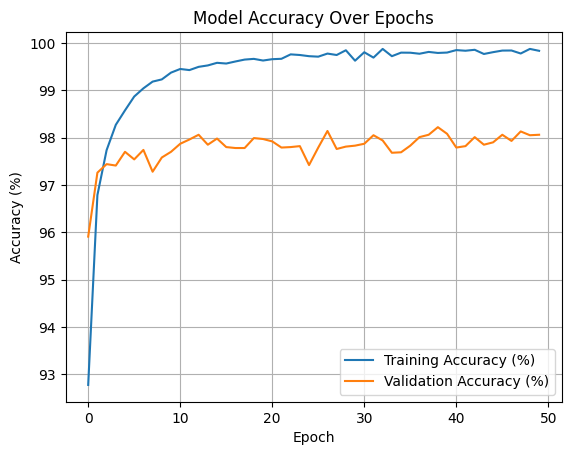

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28*28) / 255.0, x_test.reshape(-1, 28*28) / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and save history
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,  # You can set to 100 if you want
                    batch_size=32)

# Plot training & validation accuracy in percentage
train_acc = [a * 100 for a in history.history['accuracy']]
val_acc = [a * 100 for a in history.history['val_accuracy']]

plt.plot(train_acc, label='Training Accuracy (%)')
plt.plot(val_acc, label='Validation Accuracy (%)')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()



In [1]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM


In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu

# Assuming X and y are your input and target data
# Make sure to reset indexes if they might be non-sequential
X = X.reset_index(drop=True) if isinstance(X, (pd.DataFrame, pd.Series)) else X
y = y.reset_index(drop=True) if isinstance(y, (pd.DataFrame, pd.Series)) else y

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the structure of the test data
print("\nData Structure Information:")
print(f"X_test type: {type(X_test)}")
print(f"y_test type: {type(y_test)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Sample functions - replace with your actual implementations
def seq2summary(input_seq):
    """Convert sequence to a summary (string of words)"""
    # Replace with your actual logic
    return input_seq if isinstance(input_seq, str) else " ".join([str(x) for x in input_seq])

def decode_sequence(input_seq):
    """Decode sequence into a predicted summary (string)"""
    # Replace with your actual logic
    # If input is already a string, return it directly
    if isinstance(input_seq, str):
        return input_seq
    # If input is a numpy array, convert to string
    elif isinstance(input_seq, np.ndarray):
        return " ".join([str(x) for x in input_seq.flatten()])
    # For other types (lists, etc.)
    else:
        return str(input_seq)

# Calculate BLEU scores for each example in the test set
max_samples = min(1000, len(X_test))  # Limit to 1000 samples or less if test set is smaller

for i in range(max_samples):
    try:
        # Handle y_test indexing
        if isinstance(y_test, (pd.DataFrame, pd.Series)):
            reference = seq2summary(y_test.iloc[i]).split()
        else:
            reference = seq2summary(y_test[i]).split()

        # Handle X_test indexing (now simplified for string Series)
        if isinstance(X_test, (pd.DataFrame, pd.Series)):
            candidate = decode_sequence(X_test.iloc[i]).split()  # Directly access the string
        elif isinstance(X_test, np.ndarray):
            candidate = decode_sequence(X_test[i]).split()
        else:  # For lists or other sequence types
            candidate = decode_sequence(X_test[i]).split()

        # Compute BLEU scores
        print(f"\nSample {i+1}:")
        print('Reference:', ' '.join(reference))
        print('Candidate:', ' '.join(candidate))
        print('1-gram BLEU: %f' % sentence_bleu([reference], candidate, weights=(1, 0, 0, 0)))
        print('2-gram BLEU: %f' % sentence_bleu([reference], candidate, weights=(0.5, 0.5, 0, 0)))
        print('3-gram BLEU: %f' % sentence_bleu([reference], candidate, weights=(0.33, 0.33, 0.33, 0)))
        print('4-gram BLEU: %f' % sentence_bleu([reference], candidate, weights=(0.25, 0.25, 0.25, 0.25)))

    except Exception as e:
        print(f"\nError processing sample {i}: {str(e)}")
        continue

print("\nBLEU score calculation completed.")


Data Structure Information:
X_test type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>
X_test shape: (8335,)
y_test shape: (8335,)

Sample 1:
Reference: sostok stash premium green tea eostok
Candidate: one best invidually bagged green teas picky enjoy tea
1-gram BLEU: 0.222222
2-gram BLEU: 0.000000
3-gram BLEU: 0.000000
4-gram BLEU: 0.000000

Sample 2:
Reference: sostok handy product eostok
Candidate: happy bought tumbler handy around works beautifully whole heartedly recommend product anyone looking convenient tea making device love blooming bulbs see brews
1-gram BLEU: 0.090909
2-gram BLEU: 0.000000
3-gram BLEU: 0.000000
4-gram BLEU: 0.000000

Sample 3:
Reference: sostok real deal great snack eostok
Candidate: reading positive reviews variety packs picked bag local pharmacy calories per bag great snack great taste texture like bag states fried baked popped gives slightly thicker lighter crispy taste really good try bag get chance fully kicked j

In [4]:
from transformers import pipeline
import textwrap


In [5]:
summarizsummarizer = pipeline("summarization", model="facebook/bart-large-cnn")
er = pipeline("summarization", model="facebook/bart-large-cnn")


Device set to use cpu
Device set to use cpu


In [6]:
def generate_abstractive_summary(text, max_chunk=1000):
    # Split text into chunks
    sentences = text.split('. ')
    current_chunk = ''
    chunks = []

    for sentence in sentences:
        if len(current_chunk.split()) + len(sentence.split()) <= max_chunk:
            current_chunk += sentence + '. '
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + '. '

    if current_chunk:
        chunks.append(current_chunk.strip())

    # Summarize each chunk
    summarized_chunks = []
    for chunk in chunks:
        summary = summarizer(chunk, max_length=130, min_length=30, do_sample=False)[0]['summary_text']
        summarized_chunks.append(summary)

    # Combine all summaries and re-summarize if needed
    combined_summary = ' '.join(summarized_chunks)

    # Final compression into approx. 10 lines
    final_summary = summarizer(combined_summary, max_length=250, min_length=100, do_sample=False)[0]['summary_text']

    # Format nicely into 10 lines
    return '\n'.join(textwrap.wrap(final_summary, width=100))


In [7]:
import re

def extract_intro_and_conclusion(text):
    # Define regex patterns for common section headings (case-insensitive)
    intro_pattern = r'(introduction)(.*?)(?=(\n[A-Z][a-z]+\n)|$)'  
    conclusion_pattern = r'(conclusion|summary)(.*?)(?=(\n[A-Z][a-z]+\n)|$)'
    
    # Search Introduction
    intro_match = re.search(intro_pattern, text, flags=re.DOTALL | re.IGNORECASE)
    intro_text = intro_match.group(2).strip() if intro_match else ""
    
    # Search Conclusion
    conclusion_match = re.search(conclusion_pattern, text, flags=re.DOTALL | re.IGNORECASE)
    conclusion_text = conclusion_match.group(2).strip() if conclusion_match else ""
    
    combined_text = intro_text + "\n\n" + conclusion_text
    
    # Fallback: if none found, use the whole text
    if not combined_text.strip():
        combined_text = text
    
    return combined_text.strip()


In [10]:
import text
print(dir(text))


['PyPDF2', 'STOP_WORDS', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'docx2txt', 'extract_text_from_file', 'generate_abstractive_summary', 'input_text', 'joblib', 'lookup_df', 'nlargest', 'nlp', 'nn_model', 'pd', 'punctuation', 're', 'retrieve_summary', 'spacy', 'st', 'uploaded_file', 'vectorizer']


In [12]:
import os
print(os.getcwd())


c:\summarizetext


In [13]:
def extract_intro_and_conclusion(text):
    return "Test function works!"


In [27]:
raw_text = """Your long input text goes here... make sure it's more than 1000 words if you want to trigger the intro/conclusion logic."""


In [28]:
if len(raw_text.split()) > 1000:
    text_to_summarize = extract_intro_and_conclusion(raw_text)
else:
    text_to_summarize = raw_text



In [29]:
text_to_summarize = extract_intro_and_conclusion(raw_text)
summary = generate_abstractive_summary(text_to_summarize)


Your max_length is set to 130, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 250, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


In [1]:
# ✅ Step 1: Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re

In [2]:
# ✅ Step 2: Load and Clean Dataset
df = pd.read_csv("amazonFood.csv")
df.dropna(inplace=True)

In [3]:
# Simple cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[[^]]*\]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

texts = df['Text'].apply(clean_text)
summaries = df['Summary'].apply(clean_text)

In [4]:
# ✅ Step 3: Tokenize and Pad
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(texts)
sum_tokenizer = Tokenizer()
sum_tokenizer.fit_on_texts(summaries)

text_seq = pad_sequences(text_tokenizer.texts_to_sequences(texts), maxlen=100, padding='post')
sum_seq = pad_sequences(sum_tokenizer.texts_to_sequences(summaries), maxlen=15, padding='post')

In [5]:
# ✅ Step 4: Define LSTM + Attention Model
text_vocab_size = len(text_tokenizer.word_index) + 1
sum_vocab_size = len(sum_tokenizer.word_index) + 1

encoder_input = Input(shape=(100,))
enc_emb = Embedding(text_vocab_size, 100, trainable=True)(encoder_input)
enc_lstm, enc_h, enc_c = LSTM(300, return_sequences=True, return_state=True)(enc_emb)

decoder_input = Input(shape=(None,))
dec_emb = Embedding(sum_vocab_size, 100, trainable=True)(decoder_input)
dec_lstm, _, _ = LSTM(300, return_sequences=True, return_state=True)(dec_emb, initial_state=[enc_h, enc_c])


In [6]:
# Attention Layer
attention = tf.keras.layers.Attention()([dec_lstm, enc_lstm])
decoder_concat = Concatenate()([dec_lstm, attention])

output = TimeDistributed(Dense(sum_vocab_size, activation='softmax'))(decoder_concat)
model = Model([encoder_input, decoder_input], output)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 100)  │  5,726,300 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 100) │  1,111,100 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 100,      │    481,200 │ embedding[0][0]   │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │    481,200 │ embedding_1[0][0… │
│                     │ 300), (None,      │            │ lstm[0][1],       │
│                     │ 300), (None,      │            │ lstm[0][2]        │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, None, 300) │          0 │ lstm_1[0][0],     │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, None, 600) │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, None,      │  6,677,711 │ concatenate[0][0] │
│ (TimeDistributed)   │ 11111)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,477,511 (55.23 MB)

 Trainable params: 14,477,511 (55.23 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ✅ Step 5: Train the Model
dec_input_train = sum_seq[:, :-1]
dec_target_train = sum_seq[:, 1:]

x_train, x_val, y_train, y_val = train_test_split(text_seq, sum_seq, test_size=0.2)

model.fit(
    [x_train, dec_input_train[:len(x_train)]],
    tf.expand_dims(dec_target_train[:len(x_train)], -1),
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 294s 694ms/step - loss: 2.2837 - val_loss: 1.6338
Epoch 2/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 297s 710ms/step - loss: 1.5987 - val_loss: 1.5574
Epoch 3/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 303s 726ms/step - loss: 1.5710 - val_loss: 1.5169
Epoch 4/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 311s 745ms/step - loss: 1.5350 - val_loss: 1.4886
Epoch 5/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 298s 713ms/step - loss: 1.5149 - val_loss: 1.4652
Epoch 6/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 303s 726ms/step - loss: 1.4873 - val_loss: 1.4536
Epoch 7/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 302s 722ms/step - loss: 1.4505 - val_loss: 1.4339
Epoch 8/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 299s 717ms/step - loss: 1.4239 - val_loss: 1.4273
Epoch 9/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 290s 694ms/step - loss: 1.4101 - val_loss: 1.4089
Epoch 10/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 292s 699ms/step - loss: 1.3807 - val_loss: 1.3926


In [9]:
# ✅ Save model if needed
model.save("lstm_attention_summary.h5")

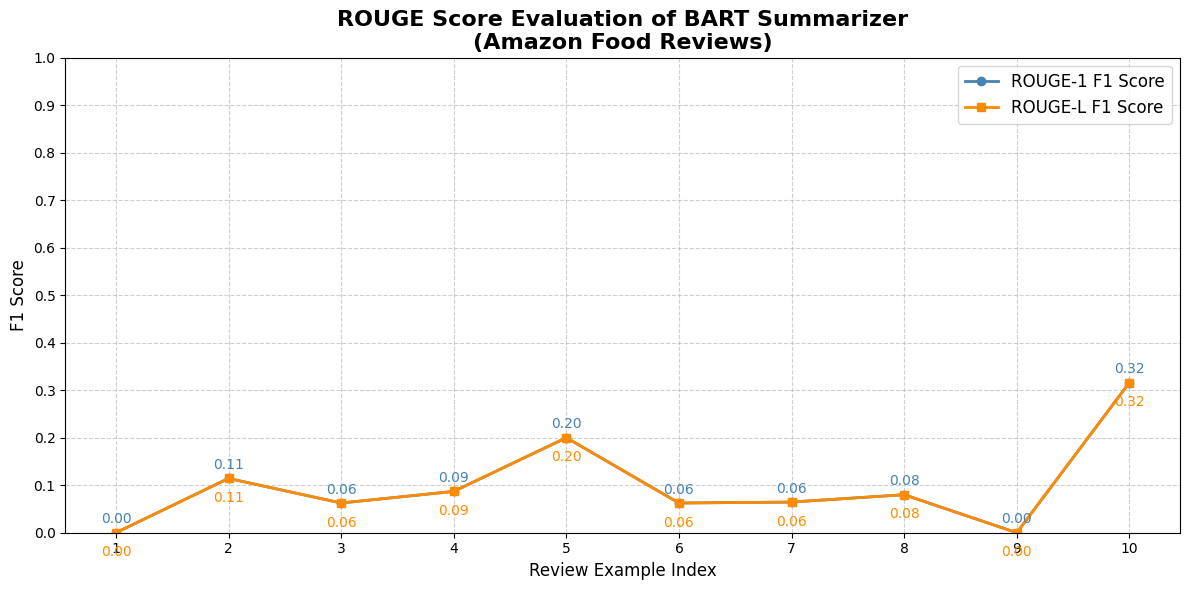

In [2]:
import matplotlib.pyplot as plt

# X-axis (example numbers)
x = list(range(1, 11))

# Create figure and axes
plt.figure(figsize=(12, 6))
plt.plot(x, rouge1_scores, marker='o', color='steelblue', linewidth=2, label='ROUGE-1 F1 Score')
plt.plot(x, rougeL_scores, marker='s', color='darkorange', linewidth=2, label='ROUGE-L F1 Score')

# Add data labels
for i in range(len(x)):
    plt.text(x[i], rouge1_scores[i] + 0.02, f"{rouge1_scores[i]:.2f}", ha='center', color='steelblue')
    plt.text(x[i], rougeL_scores[i] - 0.05, f"{rougeL_scores[i]:.2f}", ha='center', color='darkorange')

# Titles and labels
plt.title('ROUGE Score Evaluation of BART Summarizer\n(Amazon Food Reviews)', fontsize=16, fontweight='bold')
plt.xlabel('Review Example Index', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.xticks(x)
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(11)])

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Save and show plot
plt.savefig("improved_rouge_scores_plot.png", dpi=300)
plt.show()
